In [ ]:
!gdown 1N77UTqcpUMvP_cMx3YHmVFzAhsQ7kOpu

Downloading...
From: https://drive.google.com/uc?id=1N77UTqcpUMvP_cMx3YHmVFzAhsQ7kOpu
To: /content/music_instruments.zip
100% 1.22M/1.22M [00:00<00:00, 22.3MB/s]


In [ ]:
# Unzip it
import zipfile

zip_ref = zipfile.ZipFile("music_instruments.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
# Import helper functions
def split_dir_to_train_test_val(directory = "images/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [ ]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="music_instruments/images/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder drum. Train data copied. 35 files
Folder drum. Test data copied. 9 files
Folder drum. Validation data copied. 6 files
Folder flute. Train data copied. 35 files
Folder flute. Test data copied. 9 files
Folder flute. Validation data copied. 6 files
Folder guitar. Train data copied. 35 files
Folder guitar. Test data copied. 9 files
Folder guitar. Validation data copied. 6 files


In [ ]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['drum', 'flute', 'guitar'], dtype='<U6')

In [ ]:
len(class_names)

3

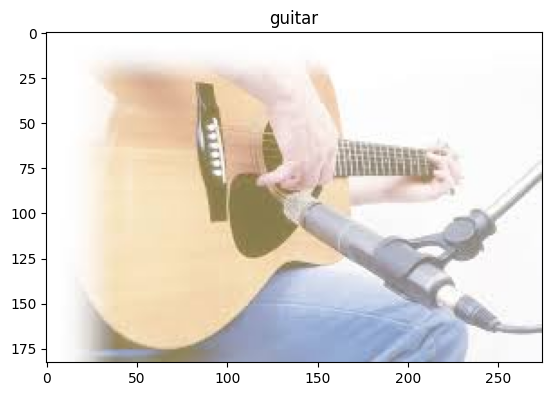

In [ ]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "guitar")

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 105 images belonging to 3 classes.
Found 27 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(3, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3317 - loss: 4.3090 - val_accuracy: 0.3889 - val_loss: 3.8305
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2855 - loss: 4.5254 - val_accuracy: 0.3333 - val_loss: 3.2671
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 782ms/step - accuracy: 0.5546 - loss: 2.3208 - val_accuracy: 0.3889 - val_loss: 3.0643
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4710 - loss: 2.3832 - val_accuracy: 0.5000 - val_loss: 2.1589
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 974ms/step - accuracy: 0.6422 - loss: 1.3291 - val_accuracy: 0.4444 - val_loss: 0.9937
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 771ms/step - accuracy: 0.4115 - loss: 0.8745 - val_accuracy: 0.7222 - val_loss: 0.7283
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.8339 - loss: 0.5271 - val_accuracy: 0.6667 - val_loss: 0.8710
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.7423 - loss: 0.5296 - val_accuracy: 0.7222 - val_loss: 0.7551
Epoch 9/10
4/4 

In [ ]:
model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8519 - loss: 0.5505


[0.5505279898643494, 0.8518518805503845]

<Axes: >

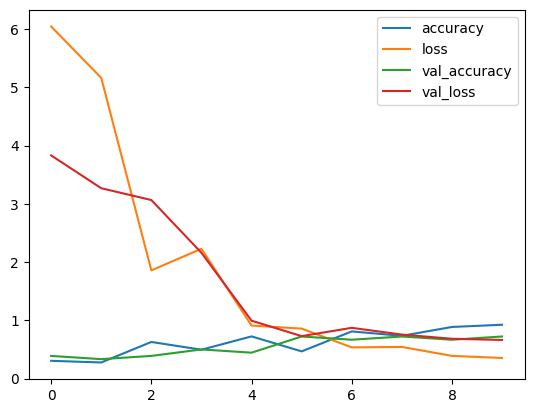

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

--2025-05-16 01:36:39--  https://i.pinimg.com/736x/61/df/f8/61dff8328c23ff53cc2e6574264f3289.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.192.228.228, 23.192.228.231, 2a04:4e42::84, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.192.228.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46618 (46K) [image/jpeg]
Saving to: ‘61dff8328c23ff53cc2e6574264f3289.jpg’

61dff8328c23ff53cc2 100%[===================>]  45.53K  --.-KB/s    in 0.02s   

2025-05-16 01:36:40 (1.94 MB/s) - ‘61dff8328c23ff53cc2e6574264f3289.jpg’ saved [46618/46618]



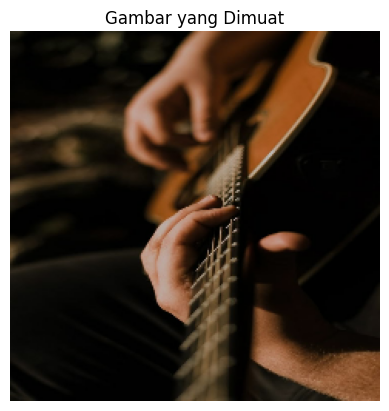

In [ ]:
# Download image
!wget https://i.pinimg.com/736x/61/df/f8/61dff8328c23ff53cc2e6574264f3289.jpg

def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("61dff8328c23ff53cc2e6574264f3289.jpg", 240)

# Show Image
plt.imshow(image)
plt.axis("off")
plt.title("Gambar yang Dimuat")
plt.show()

In [ ]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.26847297, 0.09705707, 0.6344699 ]], dtype=float32)

In [ ]:
class_names[pred[0].argmax()]

np.str_('guitar')